In [16]:
import pandas as pd
from tqdm import tqdm

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from bokeh.plotting import *
from bokeh.models import OpenURL, Circle, HoverTool, PanTool, BoxZoomTool, ResetTool, SaveTool, TapTool, WheelZoomTool

In [18]:
from PyAstronomy import pyasl
nexa = pyasl.NasaExoplanetArchive()

In [19]:
nexa.data['st_teff']

array([ 6282.,  4997.,  4997., ...,  5971.,  5723.,  3712.])

In [20]:
nexa.availableColumns()

Column        Description                          Unit 
--------------------------------------------------------
pl_hostname   Name of host star                         
pl_name       Name of the planet                        
pl_letter     Planet letter (e.g., b, c, d, etc.)       
ra            Right ascension                      deg  
dec           Declination                          deg  
pl_orbper     Planetary orbital period             d    
pl_massj      Planetary mass                       MJ   
pl_radj       Planetary radius                     RJ   
pl_trandep    Central depth of transit             %    
pl_trandur    Transit duration                     d    
pl_tranmid    Transit midpoint                     BJD  
pl_orbsmax    Semi-major-axis                      AU   
pl_orbincl    Orbital inclination of planet        deg  
st_rad        Stellar radii                        Solar
st_dist       Distance to star                     pc   
st_mass       Stellar mass     

['pl_hostname',
 'pl_name',
 'pl_letter',
 'ra',
 'dec',
 'pl_orbper',
 'pl_massj',
 'pl_radj',
 'pl_trandep',
 'pl_trandur',
 'pl_tranmid',
 'pl_orbsmax',
 'pl_orbincl',
 'st_rad',
 'st_dist',
 'st_mass',
 'st_teff',
 'st_vsini',
 'st_logg',
 'st_acts',
 'st_vj']

In [21]:
name = nexa.data['pl_hostname'].astype(str)

mass = nexa.data['pl_massj'].astype(float)

rad = nexa.data['pl_radj'].astype(float)
st_rad = nexa.data['st_rad'].astype(float)



per = nexa.data['pl_orbper'].astype(float)

teff = nexa.data['st_teff'].astype(float)

letter = nexa.data['pl_letter'].astype(str)

unq = np.unique(name, return_counts=True)[1] > 1
mask = [n in np.unique(name)[unq] for n in name]

In [22]:
params = [name[mask], mass[mask], rad[mask], per[mask], teff[mask], st_rad[mask], letter[mask]]
param_names = ['Name', 'Mass', 'Radius', 'Period', 'StTeff', 'StRadius', 'Letter']

df = pd.DataFrame()
for param, param_name in zip(params, param_names):
    df[param_name] = param


In [23]:
df.to_csv('multiples.csv', index=False)

In [24]:
df.dropna(axis=0, subset=['Radius']).reset_index(drop=True)

,Name,Mass,Radius,Period,StTeff,StRadius,Letter
0,Kepler-168,NaN,0.130,4.425391,6282.00,1.11,b
1,Kepler-169,NaN,0.101,3.250619,4997.00,0.76,b
2,Kepler-169,NaN,0.108,6.195469,4997.00,0.76,c
3,Kepler-169,NaN,0.112,8.348125,4997.00,0.76,d
4,Kepler-169,NaN,0.230,87.090195,4997.00,0.76,f
5,Kepler-170,NaN,0.285,7.930592,5679.00,1.03,b
6,Kepler-170,NaN,0.255,16.665863,5679.00,1.03,c
7,Kepler-171,NaN,0.228,11.463462,5642.00,0.84,c
8,Kepler-171,NaN,0.169,39.595519,5642.00,0.84,d
9,Kepler-172,NaN,0.210,2.940309,5526.00,1.08,b


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df['PeriodRatio'] = 0
unique_names = df.Name.unique()
for unq in tqdm(unique_names):
    pos = df.Name == unq
    df = df.set_value(pos, 'PeriodRatio', (df[pos].Period/df[pos].Period.min()))

  0%|          | 0/601 [00:00<?, ?it/s]/Users/ch/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
100%|██████████| 601/601 [00:39<00:00, 15.04it/s]


In [27]:
df[pos]

,Name,Mass,Radius,Period,StTeff,StRadius,Letter,PeriodRatio
1526,rho CrB,NaN,NaN,39.8458,5627.0,1.36,b,1.000000
1528,rho CrB,NaN,NaN,102.5400,5627.0,1.36,c,2.573421


In [28]:
df['StarInt'] = 0
for idx, n in enumerate(tqdm(unique_names)):
    df = df.set_value(df.Name == n, 'StarInt', idx)


100%|██████████| 601/601 [00:03<00:00, 185.78it/s]


In [29]:
df

,Name,Mass,Radius,Period,StTeff,StRadius,Letter,PeriodRatio,StarInt
0,Kepler-168,NaN,0.130,4.425391,6282.00,1.11,b,1.000000,0
1,Kepler-169,NaN,0.101,3.250619,4997.00,0.76,b,1.000000,1
2,Kepler-169,NaN,0.108,6.195469,4997.00,0.76,c,1.905935,1
3,Kepler-169,NaN,0.112,8.348125,4997.00,0.76,d,2.568165,1
4,Kepler-169,NaN,0.230,87.090195,4997.00,0.76,f,26.791880,1
5,Kepler-170,NaN,0.285,7.930592,5679.00,1.03,b,1.000000,2
6,Kepler-170,NaN,0.255,16.665863,5679.00,1.03,c,2.101465,2
7,Kepler-171,NaN,0.228,11.463462,5642.00,0.84,c,2.751029,3
8,Kepler-171,NaN,0.169,39.595519,5642.00,0.84,d,9.502228,3
9,Kepler-172,NaN,0.210,2.940309,5526.00,1.08,b,1.000000,4


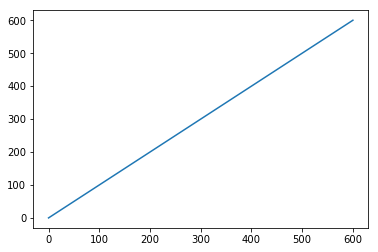

In [47]:
plt.plot(df.StarInt.unique())

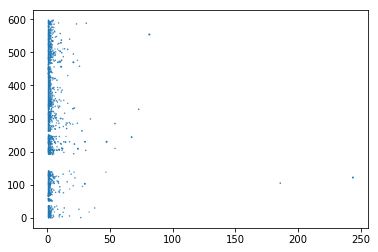

In [57]:
df = pd.read_csv('multiples.csv')
plt.scatter(df.PeriodRatio,df.StarInt,s=df.Radius)

In [61]:
np.any(np.isnan(df.Radius))

True

AttributeError: 'DataFrame' object has no attribute 'len'